# <center>ATRP Kinetic Simulator - by the Method of Moments </center>

<center>12/28/2021</center>

-----------

##  About this program

This is an atom transfer radical polymerization (ATRP) kinetic simulator based on the method of moments.[1,2] The types of polymerizations supported are conventional radical polymerization, normal atom transfer radical polymerization, activators generated by electron transfer (AGET) ATRP, activators regenerated by electron transfer (ARGET) ATRP, supplemental activator and reducing agent (SARA) ATRP, electrochemically mediated ATRP (*e*ATRP), ATRP by continuous feeding of activators (CFA), and initiators for continuous activator regeneration (ICAR) ATRP. The input includes the reaction time, the initial concentrations of reagents, and the rate coefficients of all reactions involved. The results provide the concentration changes of all species vs. time, the monomer conversion vs. time, the number average molecular weight ($M_n$) vs. time, molecular weight distribution ($M_w/M_n$) vs. time, and the mole percent of end group loss ($T_\text{mol%}$) vs. time.   

[1]: Shiping Zhu, Modeling of molecular weight development in atom transfer radical polymerization, *Macromol. Theory Simul.* **1999**, *8*, 29–37, [DOI: 10.1002/(SICI)1521-3919(19990101)8:1<29::AID-MATS29>3.0.CO;2-7](https://doi.org/10.1002/(SICI)1521-3919(19990101)8:1<29::AID-MATS29>3.0.CO;2-7).  
[2]: Erlita Mastan and Shiping Zhu, Method of moments: A versatile tool for deterministic modeling of polymerization kinetics, *Eur. Polym. J.* **2015**, *68*, 139–160, [DOI: 10.1016/j.eurpolymj.2015.04.018](https://doi.org/10.1016/j.eurpolymj.2015.04.018).

**System requirement**

*a. To run this program online*

Simply click on this [link](https://colab.research.google.com/github/wangyu16/PolymerScienceEducation/blob/master/OVESET/ATRP_Kinetic_Simulator_Moments.ipynb). As long as you have a google account, you can use this simulator as a web page on any computer without installing anything. 

*b. To deploy a modified version online*

You may want to modify this program and deploy it online, so your students or customers can use the modified program simply by clicking on a link. To do so, download this "ATRP_Kinetic_Simulator_Moments.ipynb" file at [https://github.com/wangyu16/PolymerScienceEducation/tree/master/OVESET](https://github.com/wangyu16/PolymerScienceEducation/tree/master/OVESET); then modify it and place the modified version into your Google Drive or GitHub. Next, go to https://colab.research.google.com/ and open the program you just saved in Google Drive or GitHub. Finally, in the top-right corner, you can find the options for sharing this program.  

*c. To run this program on your own computer*

This program is written in Python and runs in Jupyter Notebook. The easiest way to set up the Jupyter Notebook is to install [Anaconda](https://www.anaconda.com/distribution/) which includes python, Jupyter Notebook, and many python packages for scientific programming. Make sure you choose Python 3.6 or above because it is required for this program. After installing Anaconda, you also need to install a python package named ['ChemPy'](https://pypi.org/project/chempy/). If you use Linux, the simplest way to install ChemPy is to use the conda package manager:

```shell
conda install -c bjodah chempy pytest
pytest -rs -W ignore::chempy.ChemPyDeprecationWarning --pyargs chempy  
```

If you use Windows or OS X, you will need to use pip instead. Open "Anaconda Prompt" and type: 

```shell
python3 -m pip install chempy pytest
python3 -m pytest -rs -W ignore::chempy.ChemPyDeprecationWarning --pyargs chempy
```

After installation of Anaconda, Jupyter Notebook should appear as an app on your computer. Click on the icon of Jupyter Notebook and it will open a new tab in your browser. Download this "ATRP_Kinetic_Simulator_Moments.ipynb" file at [https://github.com/wangyu16/PolymerScienceEducation/tree/master/OVESET](https://github.com/wangyu16/PolymerScienceEducation/tree/master/OVESET), and navigate to the folder where you save it. Click on it and open it. 

**Not sure what you can change in the code?**

No worries! If you are not familiar with programming, all that you may change are located in the section "**2. Reaction conditions**". For example, in the following code block, you can change the red-colored word 'normal', and the green-colored number 90000. 

```python
# 'sara' for SARA ATRP;
# 'cfa' for ATRP by continuous feeding of activators;
# 'icar' for ICAR ATRP.
Poly_type = 'normal' 

############################    
# 2. Set the reaction time #
############################ 
# This is a required section.
# Set reaction time limit in seconds. 
react_time = 90000 
```

Similarly, in the following code, only change the green-colored numbers. 

```python
# Set the rate coefficients for the addition of the first monomer to the primary radical;
# the termination between primary radicals; the termination between a primary radical and a propagating radical. 
k_p_R = 1.3e3 
k_t_R = 1e9 
k_t_R_Pn = 1e9
```

In addition, you can change the font size of the plots under "**1. Import packages**" and "**5.1. Concentration changes**". Change the green-colored numbers only in the following code lines. 

```python
plt.rcParams.update({'font.size': 18}) # Feel free to change the font size in the plots.
```

```python
     _ = ax.legend(loc='best',prop={'size': 12}) # Set the font size of the legend here. 
```

**How to run the simulation?**

After specifying the initial reaction conditions, move to the first code cell, i.e., the one under "**1. Import packages**". Run the code cells one-by-one by using <kbd>Shift</kbd>+<kbd>Enter</kbd>. Alternatively, you can select "Run All" under "Cell" dropdown menu if you use Anaconda, or under "Runtime" dropdown menu if you use Google Colab. 

----------

## 1. Import packages 

In [25]:
%%capture
import sys
if not 'chempy' in sys.modules:
    !pip install chempy
from chempy import ReactionSystem, Substance
from chempy.kinetics.ode import get_odesys 
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12}) # Feel free to change the font size in the plots.
from ipywidgets import interact
import datetime
import csv

## 2. Reaction conditions

In [26]:
##################################
# 1. Select the type of reaction # 
# This is a required section.    #
##################################
# Choose the type of polymerization you want to simulate
# by setting the value of Poly_type as:
# 'conven' for conventional radical polymerization initiated by a thermal initiator, such as AIBN;
# 'normal' for normal ATRP;
# 'arget' for ARGET and AGET ATRP;
# 'eatrp' for electrochemically mediated ATRP;
# 'sara' for SARA ATRP;
# 'cfa' for ATRP by continuous feeding of activators;
# 'icar' for ICAR ATRP. 
Poly_type = 'normal'

############
# Optional #
############
Monomer = 'MA'
Solvent = 'MeCN' # For bulk polymerization, the value can be set as 'none'.
Ligand = 'TPMA' # For conventional radical polymerization, this value could be set as 'none'.
Initiator = 'EBrP' # For ICAR ATRP, this value could be set in the form of 'EBrP-AIBN'.
Temperature = 40
# The name of the monomer, ligand, initiator ,and the temperature will not be used in the simulation.
# They are used only as a record in the exported file. 

##############################    
# 2. Set the reaction time   #
# This is a required section.#
##############################
# Set reaction time limit in seconds. 
# For a 10 hour reaction, you can set the time as 36000 or 10*3600.
react_time = 18000

###########################################################
# 3. Set the initial concentrations and rate coefficients #
###########################################################
   
##############################
# 3.1. Monomer concentration #
# This is a required section.#
##############################
# Set the initial concentration of the monomer. All the concentrations are in mol/L unless otherwise specified.
c0_M = 5.5
# Set the molecular weight of the monomer. 
MM = 86.09

##################################################################
# 3.2. Common reactions for all kinds of radical polymerizations #
# This is a required section.                                    #
##################################################################

# Set the rate coefficients for propagation and termination (by coupling or by disproportionation).
# Propagation rate coefficients could be found here (http://www.ceic.unsw.edu.au/kpcalculator/kp.html)
k_p = 22000
k_tc = 1e8
k_td = 1e7

# Set the rate coefficients for the addition of the first monomer to the primary radical;
# the termination between primary radicals; the termination between a primary radical and a propagating radical. 
k_p_R = 22000
k_t_R = 2.5e9
k_t_R_Pn = 1e8 

# Set the rate coefficient for chain transfer to monomer.
k_tr_M = 0

# If syrenic type of monomers is used,
# set the rate coefficient of the thermal initiation of the monomer. 
# Leave this value as 0 when you do not want to consider thermal initiation. 
# For styrene, the value can be calculated as 2.2e5*exp(-13810/T), where T is the temperature in K. 
k_th_S = 0

##############################################################
# 3.3. For conventional radical polymerization and ICAR ATRP #
##############################################################
# If a thermal initiator (TI), e.g., AIBN, BPO, is used in your reaction,
# set the initial concentration of the initiator.
c0_TI = 0.0025

# Set the decomposition rate coefficient and the initiation efficiency for the initiator.
k_d_TI = 2.63e-5
f_TI = 0.8

##############################
# 3.4. For all kinds of ATRP #
##############################
# Set the initial concentration of RX. 
c0_RX = 0.0275 

# Set the initial concentration of Cu(I) and Cu(II).
# Assume there is a sufficient amount of ligand to coordinate with all Cu(I) and Cu(II),
# and the concentration of free ligand does not affect the reaction kinetics. 
c0_CuI = 0.00275
c0_CuII = 0.00275

# Set the rate coefficients for activation of RX; deactivation of radical R;  
k_a_0_atrp = 6
k_d_0_atrp = 1e8
# Set the rate coefficient for activation of a polymer with a halogen chain end; 
# deactivation of a propagating radical. 
k_a_atrp = 6
k_d_atrp = 1e8

##################################   
# 3.4.1. For AGET and ARGET ATRP #
##################################
# Set the initial concentration of the reducing agent. 
c0_Reduc = 2.5e-3 

# Set the reduction rate coefficient
k_reduc = 1e-1 

####################
# 3.4.2. For eATRP #
####################
# Set the rate coefficient of electronic reduction. 
# This will mimic an eATRP process with constant voltage. 
# CuII is converted to CuI at a rate of k_e_reduc*[CuII].
k_e_reduc = 1e-7 

###################
# 3.4.3. For SARA #
###################
# set the initial concentration of Cu(0) in cm^2/mL (surface area per unit volume). 
# Assume the Cu(0) wire or foil is thick enough that there is no apparent consumption during the polymerization.
c0_Cu0 = 2 

# Set the rate coefficients of Cu(0) activation and comproportionation.
# Deactivation by Cu(I) and disproportionation are neglected. 
k_comp = 1e-4 
k_a_Cu0 = 1e-4 

#######################################################
# 3.4.4. For ATRP by continuous feeding of Activators #
#######################################################
# Set the rate coefficient to minic different feeding rate. 
# CuI concentration will increase at a constant rate of k_cfa.
# Volume change is neglected. 
k_cfa = 1.4e-8 

## 3. Construct the reaction system

In [27]:
# Initiate the reaction system with null value. 
# The rsys_orig is the system of the actual reactions.
# The rsys_pseudo includes the pseudo reactions with pseudo species 
# which are used to introduce 1st and 2nd order moments
# and to adjust the reactions to take into account the initiation efficiency, etc. 
rsys_orig = ReactionSystem.from_string("""
    """, substance_factory=Substance)
rsys_pseudo =  ReactionSystem.from_string("""
    """, substance_factory=Substance)

# Initial concentrations of monomer, dead chains, radicals, and pseudo species of moments.
c0 = defaultdict(float, {'M': c0_M, 'D': 0, 'PnD': 0, 'PnDPn': 0, 'R': 0, 'Pn': 0, 'M1_Pn': 0, \
                         'M1_PnX': 0, 'M1_PnD': 0, 'M1_PnDPn': 0, 'M2_total': 0}) 

# Add propagation and termination reactions to the reaction system. 
rsys_orig += ReactionSystem.from_string(f"""
    R + M -> Pn; {k_p_R}
    Pn + M -> Pn; {k_p}      
    R + R -> D + D; {k_t_R}
    Pn + R -> PnD + D; {k_t_R_Pn}
    Pn + Pn -> PnD + PnD; {k_td}
    Pn + Pn -> PnDPn; {k_tc}
    """, substance_factory=Substance)
rsys_pseudo += ReactionSystem.from_string(f"""
    R + M -> R + M + M1_Pn + M2_total; {k_p_R}
    Pn + M -> Pn + M + M1_Pn + M2_total; {k_p}
    M1_Pn + M -> M1_Pn + M + M2_total; {2*k_p}
    M1_Pn + R -> M1_PnD + R; {k_t_R_Pn}
    M1_Pn + Pn -> M1_PnD + Pn; {2*k_td}
    M1_Pn + Pn -> M1_PnDPn + Pn; {2*k_tc}
    M1_Pn + M1_Pn -> M1_Pn + M1_Pn + M2_total; {2*k_tc}
    """, substance_factory=Substance)

# To include chain transfer to monomer
if k_tr_M !=0:
        rsys_orig += ReactionSystem.from_string(f"""
        Pn + M -> PnD + R; {k_tr_M}            
        """, substance_factory=Substance) 
        rsys_pseudo += ReactionSystem.from_string(f"""
        M1_Pn + M -> M1_PnD + M; {k_tr_M}
    """, substance_factory=Substance)

# To include the thermal initiaion for styrenic monomers
if k_th_S != 0:
    rsys_orig += ReactionSystem.from_string(f"""
        M + M + M -> R + R; {k_th_S}            
        """, substance_factory=Substance) 

# For all kinds of ATRP 
if Poly_type != 'conven':
    c0.update({'RX': c0_RX, 'PnX':0, 'CuI': c0_CuI, 'CuII': c0_CuII})
    rsys_orig += ReactionSystem.from_string(f"""
        CuI + RX -> CuII + R; {k_a_0_atrp}     
        CuII + R -> CuI + RX; {k_d_0_atrp}
        CuI + PnX -> CuII + Pn; {k_a_atrp}
        CuII + Pn -> CuI + PnX; {k_d_atrp}        
        """, substance_factory=Substance)  
    rsys_pseudo += ReactionSystem.from_string(f"""
        M1_PnX + CuI -> M1_Pn + CuI; {k_a_atrp}
        M1_Pn + CuII -> M1_PnX + CuII; {k_d_atrp}
        """, substance_factory=Substance) 
    
# For AGET and ARGET ATRP
if Poly_type == 'arget':
    c0.update({'Reduc': c0_Reduc, 'ReducX':0})

    rsys_orig += ReactionSystem.from_string(f"""
        Reduc + CuII -> ReducX + CuI; {k_reduc}
        """, substance_factory=Substance)    
      
# For eATRP 
if Poly_type == 'eatrp':
    c0.update({'elec': 1})    

    rsys_orig += ReactionSystem.from_string(f"""
        elec + CuII -> CuI + elec; {k_e_reduc}
        """, substance_factory=Substance)   

# For SARA ATRP
if Poly_type == 'sara':
    c0.update({'Cu0': c0_Cu0})    

    rsys_orig += ReactionSystem.from_string(f"""
        Cu0 + CuII -> CuI + CuI + Cu0; {k_comp}
        Cu0 + RX -> CuI + R + Cu0; {k_a_Cu0}
        """, substance_factory=Substance)

# For ATRP by continuous feeding of activators
if Poly_type == 'cfa':
    c0.update({'CuIsour': 1})    

    rsys_orig += ReactionSystem.from_string(f"""
        CuIsour -> CuI + CuIsour; {k_cfa}
        """, substance_factory=Substance)  

# For conventional radical polymerization and ICAR ATRP 
# The thermal initiator is consumed with a rate coefficient k_d_TI;
# however, not all of the primary radicals would involve in propagation.
# To take into account the initiation efficiency, pseudo reactions and a pseudo species 'PR' are introduced. 
if Poly_type == 'conven' or Poly_type == 'icar':
    c0.update({'TI': c0_TI, 'PR': 0})   
    rsys_orig += ReactionSystem.from_string(f"""
        TI -> R + R; {k_d_TI}
        """, substance_factory=Substance)
    rsys_pseudo += ReactionSystem.from_string(f"""
        TI -> R + R; {-k_d_TI}
        TI -> PR + PR; {k_d_TI}    
        TI -> TI + R + R; {f_TI*k_d_TI}
        """, substance_factory=Substance)  

**Show the reaction equations and the initial concentrations of reagents**

In [28]:
# Show the reactions and the rate coefficients in the system
rsys_orig

In [29]:
# List the initial concentrations of reagents
for key in c0:
    if c0[key] != 0:
        print(key, ': ', c0[key])

M :  5.5
RX :  0.0275
CuI :  0.00275
CuII :  0.00275


## 4. Simulation 

**List of the differential equations**

In [30]:
# Combine the actual and the pseudo reaction systems
rsys = rsys_orig + rsys_pseudo

# Get the differential equation system from the reactions.
odesys, extra = get_odesys(rsys)

# List the differential equations
for index, exp in enumerate(odesys.exprs):
    if odesys.names[index] != 'PR':
        print(odesys.names[index], ': ', f'dy_{index}/dt', '= ',  exp)

D :  dy_0/dt =  100000000.0*y_2*y_5 + 5000000000.0*y_5**2
M :  dy_1/dt =  -22000*y_1*y_2 - 22000*y_1*y_5
Pn :  dy_2/dt =  22000*y_1*y_5 - 220000000.0*y_2**2 - 100000000.0*y_2*y_5 - 100000000.0*y_2*y_7 + 6*y_6*y_8
PnD :  dy_3/dt =  20000000.0*y_2**2 + 100000000.0*y_2*y_5
PnDPn :  dy_4/dt =  100000000.0*y_2**2
R :  dy_5/dt =  -22000*y_1*y_5 - 100000000.0*y_2*y_5 - 5000000000.0*y_5**2 - 100000000.0*y_5*y_7 + 6*y_6*y_9
CuI :  dy_6/dt =  100000000.0*y_2*y_7 + 100000000.0*y_5*y_7 - 6*y_6*y_8 - 6*y_6*y_9
CuII :  dy_7/dt =  -100000000.0*y_2*y_7 - 100000000.0*y_5*y_7 + 6*y_6*y_8 + 6*y_6*y_9
PnX :  dy_8/dt =  100000000.0*y_2*y_7 - 6*y_6*y_8
RX :  dy_9/dt =  100000000.0*y_5*y_7 - 6*y_6*y_9
M1_Pn :  dy_10/dt =  22000*y_1*y_2 + 22000*y_1*y_5 - 220000000.0*y_10*y_2 - 100000000.0*y_10*y_5 - 100000000.0*y_10*y_7 + 6*y_14*y_6
M1_PnD :  dy_11/dt =  20000000.0*y_10*y_2 + 100000000.0*y_10*y_5
M1_PnDPn :  dy_12/dt =  200000000.0*y_10*y_2
M2_total :  dy_13/dt =  44000*y_1*y_10 + 22000*y_1*y_2 + 22000*y_1*y_

The differential equation system includes not only the real species, i.e., those taht appear in the actual reactions, but also the pseudo species, e.g., the 1st and 2nd order moments. 

#### About the integrator and the integration method

If you are not familiar with the ode integrators and the numerical methods, just leave the default setting without any change. 

For advanced users, the following information could be helpful. 

By default, the program uses scipy.integrate.ode as the ODE integrator with “lsoda” as the selected method. The "lsoda" method automatically switches for stiff and non-stiff ODEs. This subroutine uses the Adams method for non-stiff ODEs and a backward differentiation formula (BDF) method for stiff ODEs. Other available methods can be found on the [official website of scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html#scipy.integrate.ode). For more options, please visit the [website of pyodesys](https://pypi.org/project/pyodesys/0.1.2/). You can install packages and use integrators other than scipy. 

**Integration**

In [31]:
# Integration
tout = sorted(np.concatenate((np.linspace(0, react_time), np.logspace(0, np.floor(np.log10(react_time))))))
result = odesys.integrate(tout, c0, integrator='scipy', method='lsoda', atol=1e-12, rtol=1e-6)

## 5. Results

### 5.1. Concentration changes

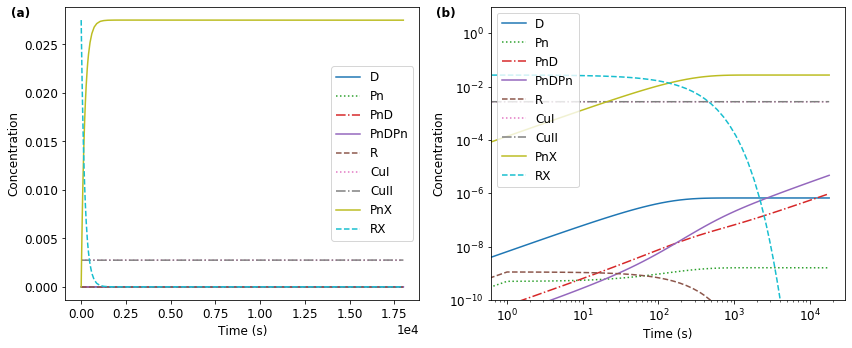

In [32]:
# Plot the concentrations of species in the reaction system vs time. 
# The change of monomer concentration is not included here since monomer conversion will be plotted later.
labels=['(a)','(b)','(c)']
i=0
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax in axes:
     _ = result.plot(names=[k for k in rsys_orig.substances if k != 'CuIsour' \
                            and k != 'M' and k!= 'elec' and k != 'Cu0'], ax=ax) 
     _ = ax.legend(loc='best',prop={'size': 12}) # Set the font size of the legend here.    
     _ = ax.set_xlabel('Time (s)')
     _ = ax.set_ylabel('Concentration')
     _ = ax.text(-0.1, 1, labels[i], transform=ax.transAxes, fontweight='bold', va='top', ha='right')
     i+=1
axes[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
_ = axes[1].set_ylim([1e-10, 1e1])
_ = axes[1].set_xscale('log')
_ = axes[1].set_yscale('log')
_ = fig1.tight_layout()

#### Meanings of the species produced during the polymerization

R: primary radical either from RX or from the thermal initiator  
D: termination product from primary radicals  
Pn: propagating polymer chain with a chain end radical  
PnD: dead polymer chain produced by termination through disproportionation  
PnDPn: dead polymer chain produced by termination through coupling  
PnX: dormant polymer chain with an active halogen chain-end  

### 5.2. Monomer conversion vs time

In [33]:
# Get concentrations and calculate conversion, Mn and Mw/Mn.
ConcM = result[1][:,result.odesys.names.index('M')]
ConcD = result[1][:,result.odesys.names.index('D')]
ConcPnD = result[1][:,result.odesys.names.index('PnD')]
ConcPnDPn = result[1][:,result.odesys.names.index('PnDPn')]
ConcPn = result[1][:,result.odesys.names.index('Pn')]
ConcM2_total = result[1][:,result.odesys.names.index('M2_total')]

if Poly_type != 'conven':
    ConcPnX = result[1][:,result.odesys.names.index('PnX')]
else:
    ConcPnX = np.zeros(len(result[0]))

ConvM =(ConcM[0]-ConcM)/ConcM[0]
LnM0_M = np.log(ConcM[0]/ConcM)

Mn = np.zeros(len(result[0]))
Mw = np.zeros(len(result[0]))
Mw_Mn = np.ones(len(result[0]))

Mn[1:] = (ConcM[0]-ConcM[1:])/(ConcPnX[1:] + ConcPnD[1:] + ConcPnDPn[1:] + ConcPn[1:])*MM
Mw[1:] = ConcM2_total[1:]/(ConcM[0]-ConcM[1:])*MM    
Mw_Mn[1:] = Mw[1:]/Mn[1:]

# Get mole percent of end group loss, i.e., Tmol%.
if Poly_type != 'conven':
    x=result.odesys.names.index('RX')
    Tmol = 100*(ConcD + ConcPnD + 2*ConcPnDPn)/result[1][0,x]
else:
    Tmol = 100*np.ones(len(result[0]))
    
result_cal = [result[0],ConcM,ConvM,LnM0_M,Mn,Mw_Mn,Tmol]

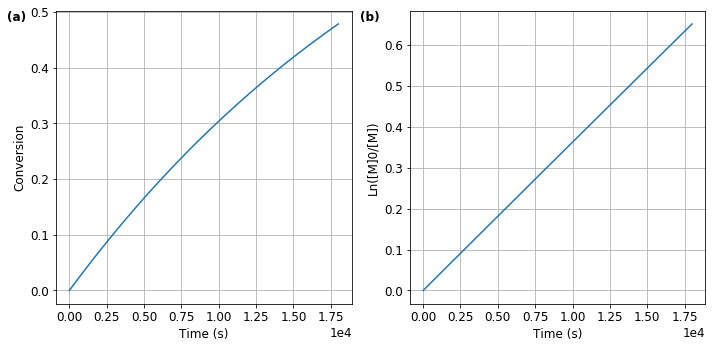

In [43]:
# Monomer conversion vs. time and first order kinetic plots. 
fig2, axes = plt.subplots(1, 2, figsize=(10, 5))
i=0
for ax in axes:
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    _ = ax.plot(result_cal[0], result_cal[i+2])
    _ = ax.text(-0.1, 1, labels[i], transform=ax.transAxes, fontweight='bold', va='top', ha='right')
    _ = ax.grid()
    i += 1
_ = axes[0].set(xlabel = 'Time (s)', ylabel='Conversion')
_ = axes[1].set(xlabel = 'Time (s)', ylabel='Ln([M]0/[M])')
_ = fig2.tight_layout()

### 5.3. Molecular weight, molecular weight distribution and mole percent loss of chain-ends. 

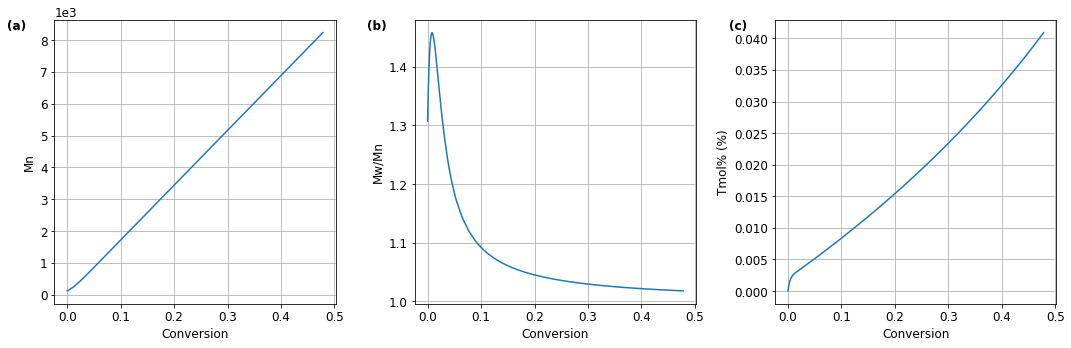

In [44]:
# Plot Mn, Mw/Mn and Tmol% vs. conversion. 
fig3, axes = plt.subplots(1, 3, figsize=(15, 5))
i=0
for ax in axes:
    _ = ax.plot(result_cal[2][1:], result_cal[i+4][1:])
    _ = ax.text(-0.1, 1, labels[i], transform=ax.transAxes, fontweight='bold', va='top', ha='right')
    _ = ax.grid()
    i += 1
_ = axes[0].set(xlabel = 'Conversion', ylabel='Mn')
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
_ = axes[1].set(xlabel = 'Conversion', ylabel='Mw/Mn')
_ = axes[2].set(xlabel = 'Conversion', ylabel='Tmol% (%)')
_ = fig3.tight_layout()

if Poly_type == 'conven':
    print('Tmol% does not apply to conventional radical polymerization.')

Note: the meaning of mole percent loss of the chain end, i.e., $T_\text{mol%}$, can be found in the following article.[3] This calculated $T_\text{mol%}$ values could be significantly different from the experimental values because in the simulation only direct termination between two radicals is taken into account for the loss of chain-end functionalities, while other possible reactions causing the loss of chain ends, e.g., Cu(I) induced catalytic radical termination,[4] are not included. 

[3]: Yu Wang, Mingjiang Zhong, Yaozhong Zhang, Andrew J. D. Magenau, and Krzysztof Matyjaszewski, Halogen Conservation in Atom Transfer Radical Polymerization, *Macromolecules* **2012**, *45*, 8929-8932, [DOI: 10.1021/ma3018958](https://doi.org/10.1021/ma3018958)  
[4]: Yu Wang, Nicolai Soerensen, Mingjiang Zhong, Hendrik Schroeder, Michael Buback, and Krzysztof Matyjaszewski,
Improving the “Livingness” of ATRP by Reducing Cu Catalyst Concentration, *Macromolecules* **2013**, *46*, 683-691, [DOI: 10.1021/ma3024393](https://doi.org/10.1021/ma3024393). 

## 6. Export the results

In [12]:
# Export the result to a CSV file.
# If you run this program on your own computer, the CSV file is saved in the same folder as this ipynb file. 
# If you run this program online at https://colab.research.google.com/, 
# you can find the a menu bar on the left side. 
# Click on the fourth one called "Files" and you will see the exported files. 

now = datetime.datetime.now()
filename = f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-ATRP-Simulation-{Poly_type}-{Monomer}-{Solvent}-{Ligand}-{Initiator}-{Temperature}C.csv'

with open(filename, 'w', newline='') as f:
    thewriter = csv.writer(f)
    for rxn in rsys_orig.rxns:
        thewriter.writerow([rxn])
    if Poly_type == 'conven' or Poly_type == 'icar':
        thewriter.writerow([f'The initiation efficiency of the thermal initiator is {f_TI}.'])
    for index, exp in enumerate(odesys.exprs):
        if odesys.names[index] != 'PR':
            thewriter.writerow([f'{odesys.names[index]}:',f'dy_{index}/dt = {exp}'])    
    if Poly_type == 'conven':
        thewriter.writerow(['Tmol% does not apply to conventional radical polymerization.'])
    thewriter.writerow(['time (s)']+[k for k in rsys.substances if k != 'PR']+['conversion']+['ln([M]0/[M])']\
                       +['Mn']+['Mw/Mn']+['Tmol% (%)'])
    i=0
    for concen in result[1]:
        thewriter.writerow([result_cal[0][i]]+[concen[result.odesys.names.index(k)] for k in rsys.substances \
                                               if k != 'PR'] +[ConvM[i]]+[LnM0_M[i]]+[Mn[i]]+[Mw_Mn[i]]+[Tmol[i]])
        i+=1

In [24]:
# Export the plots as pdf and png files.

fig1.savefig(f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-concentration.pdf', bbox_inches='tight')
fig1.savefig(f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-concentration.png', bbox_inches='tight', dpi=600)

fig2.savefig(f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-conversion.pdf', bbox_inches='tight')
fig2.savefig(f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-conversion.png', bbox_inches='tight', dpi=600)

fig3.savefig(f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-molecular_weight.pdf', bbox_inches='tight')
fig3.savefig(f'{now.strftime("%Y-%m-%d-%Hh%Mm%Ss")}-molecular_weight.png', bbox_inches='tight', dpi=600)

-----------

Copyright &copy; 2021 Yu Wang

This program is free software. Redistribution and modification are permitted under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or any later version, see <http://www.gnu.org/licenses/>.

No guarantees are made that the results of this program are correct and the author assumes no liability for their reliability.

<center><img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/65e7e0eb7d7fb9af687c84be7015b4f42fd25493/Fig/ATRP_Kinetic_Simulator.svg" width='300' /></center>